## EDA 

In [1]:
#system settings
import sys
sys.path.append("..") # Append source directory to our Python path

#basics
import pandas as pd
import numpy as np


#viz
import matplotlib.pyplot as plt
import seaborn as sns

#nlp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

#misc
from preprocessing import *
from utils import *

#feature engineering 
from feature_adder import *

#settings
color = sns.color_palette()
eng_stopwords = set(stopwords.words("english"))
sys.path.append("..") # Append source directory to our Python path
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dkoimtzo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dkoimtzo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:

print ('The size of the train set is {} and the size of the test set is {}'.format(train.shape, test.shape))

The size of the train set is (159571, 8) and the size of the test set is (153164, 2)


In [4]:
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


In [5]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64
filling NA with "unknown"


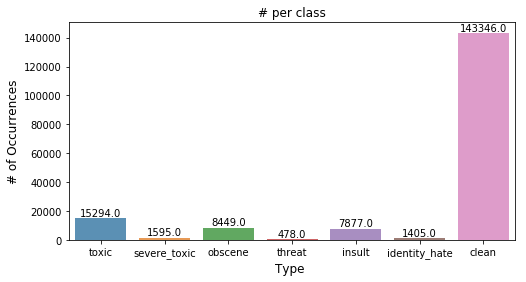

In [6]:
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

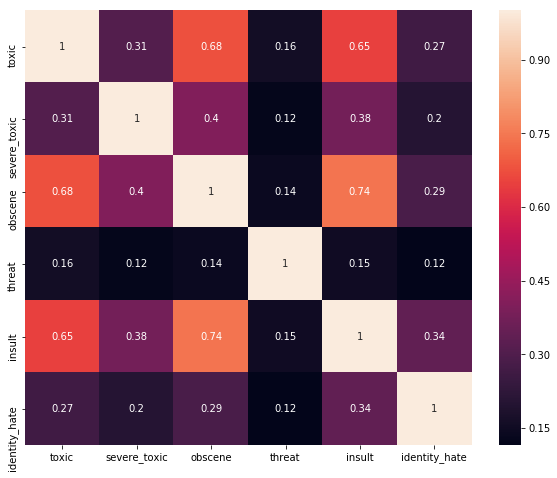

In [7]:
temp_df=train.iloc[:,2:-1]
corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

### High correllation between: 
- Obsence and toxic
- Obsence and insult
- Toxic and insult

        

In [8]:
columns = TAGS
counts_of_vector = train.groupby(['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])['toxic'].value_counts()
counts_of_vector.to_dict()
counts_of_vector

severe_toxic  obscene  threat  insult  identity_hate  toxic
0             0        0       0       0              0        143346
                                                      1          5666
                                       1              1           136
                                                      0            54
                               1       0              1          1215
                                                      0           301
                                       1              1           134
                                                      0            28
                       1       0       0              1           113
                                                      0            22
                                       1              1             7
                               1       0              1            16
                                                      0             3
                              

### Correlation matrix with the new features

In [93]:
df = FeatureAdded(upper_case=True, word_count=True, unique_words_count=True,
                      letter_count=True, punctuation_count=True, little_case=True,
                      stopwords=True, question_or_exclamation=True)
df_train, df_test = df.add_features(train, test)


In [31]:
temp_df=df_train.iloc[:,2:-1]
temp_df[temp_df.TAGS].corr()[['clean']]

AttributeError: 'DataFrame' object has no attribute 'TAGS'

In [112]:
df_train.columns

Index(['index', 'id', 'comment_text', 'toxic', 'severe_toxic', 'obscene',
       'threat', 'insult', 'identity_hate', 'clean', 'count_words_upper',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_title', 'count_stopwords',
       'question_mark', 'exclamation_mark'],
      dtype='object')

In [136]:
temp_df=df_train
x_variables= TAGS + ['clean']
y_variables= ['toxic', 'clean', 'question_mark']
#corr = temp_df[x_variables].corr()['toxic']
temp_df.corr().iloc['special_col', :-1]
plt.figure(figsize=(20,10))
sns.heatmap(corr,
            #xticklabels=x_variables,
            #yticklabels=y_variables, 
            #annot=True
           )
plt.show()

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [117]:
temp_df.columns

Index(['index', 'id', 'comment_text', 'toxic', 'severe_toxic', 'obscene',
       'threat', 'insult', 'identity_hate', 'clean', 'count_words_upper',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_title', 'count_stopwords',
       'question_mark', 'exclamation_mark'],
      dtype='object')

In [28]:
phrase = {'comment_text':'Mimis is Ask You MPLA MPLA such a GOOD BOY!!!'}
phrase_to_df = pd.DataFrame([phrase])
phrase_to_df ["count_words_upper"] = phrase_to_df ['comment_text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [22]:
phrase_to_df

,phrase,count_words_upper
0,Mimis is Ask You MPLA MPLA such a GOOD BOY!!!,4


In [26]:
import feature_adder as ft

In [29]:
df = FeatureAdded(upper_case=True)

df_train, df_test = df.add_features(phrase_to_df, phrase_to_df)
print(df_train.head(1))


                                    comment_text  count_words_upper
0  Mimis is Ask You MPLA MPLA such a GOOD BOY!!!                  4
